# ORIE 4580/5580/5581 Assignment 4

#### Students: Kahei Lam（kl2235) and Patric Huang (jh3223)

### Github link: https://github.com/Althealam/ORIE-5580-Simulation-Modeling-Analysis/blob/main/HW4/ORIE_5580_hw4(1).ipynb


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans.

In [ ]:
import numpy as np

n_passengers = 10000
arrival_times = np.random.uniform(0, 1000, n_passengers)
arrival_times.sort()

next_train_times = np.ceil(arrival_times / 10) * 10
wait_times = next_train_times - arrival_times

mean_wait = np.mean(wait_times)
std_wait = np.std(wait_times, ddof=1)
ci_low = mean_wait - 1.96 * std_wait / np.sqrt(n_passengers)
ci_high = mean_wait + 1.96 * std_wait / np.sqrt(n_passengers)

print(f"Expected wait time: {mean_wait:.4f} minutes")
print(f"95% CI: [{ci_low:.4f}, {ci_high:.4f}] minutes")

Expected wait time: 5.0007 minutes
95% CI: [4.9437, 5.0576] minutes


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans.

In [ ]:
import numpy as np

n_passengers = 10000
arrival_times = np.random.uniform(0, 1000, n_passengers)
arrival_times.sort()

train_times = [0]
while train_times[-1] < 1000 + 50:
    train_times.append(train_times[-1] + np.random.exponential(10))
train_times = np.array(train_times)

wait_times = []
for t in arrival_times:
    next_train = train_times[train_times >= t][0]
    wait_times.append(next_train - t)
wait_times = np.array(wait_times)

mean_wait = np.mean(wait_times)
std_wait = np.std(wait_times, ddof=1)
ci_low = mean_wait - 1.96 * std_wait / np.sqrt(n_passengers)
ci_high = mean_wait + 1.96 * std_wait / np.sqrt(n_passengers)

print(f"Expected wait time: {mean_wait:.4f} minutes")
print(f"95% CI: [{ci_low:.4f}, {ci_high:.4f}] minutes")

Expected wait time: 8.8857 minutes
95% CI: [8.7183, 9.0532] minutes


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [ ]:
import numpy as np

interarrival_times = np.diff(train_times)

mean_interarrival = np.mean(interarrival_times)

std_interarrival = np.std(interarrival_times, ddof=1)
n_trains = len(interarrival_times)
ci_low = mean_interarrival - 1.96 * std_interarrival / np.sqrt(n_trains)
ci_high = mean_interarrival + 1.96 * std_interarrival / np.sqrt(n_trains)

print(f"Empirical mean interarrival time: {mean_interarrival:.4f} minutes")
print(f"95% CI: [{ci_low:.4f}, {ci_high:.4f}] minutes")

Empirical mean interarrival time: 9.0719 minutes
95% CI: [7.4603, 10.6834] minutes


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.

In [ ]:
import numpy as np

I_passenger = []
for t in arrival_times:
    n = np.argmax(train_times >= t)
    I_passenger.append(train_times[n] - train_times[n-1])
I_passenger = np.array(I_passenger)

mean_I = np.mean(I_passenger)
std_I = np.std(I_passenger, ddof=1)
ci_low = mean_I - 1.96 * std_I / np.sqrt(len(I_passenger))
ci_high = mean_I + 1.96 * std_I / np.sqrt(len(I_passenger))

print(f"Passenger-sampled mean headway: {mean_I:.4f} minutes")
print(f"95% CI: [{ci_low:.4f}, {ci_high:.4f}]")

Passenger-sampled mean headway: 17.7589 minutes
95% CI: [17.5256, 17.9922]


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

in part a, trains come exactly every 10 minutes, every passenger experiences the same 10-minute cycle. So the gap they land in is always 10, and their expected wait is half of that: 5 minutes.

in part b, trains come “on average” every 10 minutes, but with randomness. Sometimes the gap is very short (2 minutes), sometimes very long (30 minutes). 	Even though the average headway = 10, passengers don’t see headways uniformly.

Passengers are more likely to arrive during long gaps because those gaps occupy more time.

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

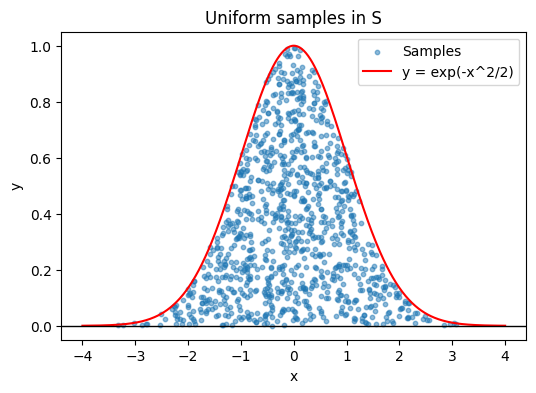

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
X = np.random.normal(0, 1, n)

Y = np.random.uniform(0, np.exp(-X**2 / 2))
x_grid = np.linspace(-4, 4, 400)
plt.figure(figsize=(6,4))
plt.scatter(X, Y, s=10, alpha=0.5, label="Samples")
plt.plot(x_grid, np.exp(-x_grid**2/2), color="red", label="y = exp(-x^2/2)")
plt.axhline(0, color="black", linewidth=1)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Uniform samples in S")
plt.show()

<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

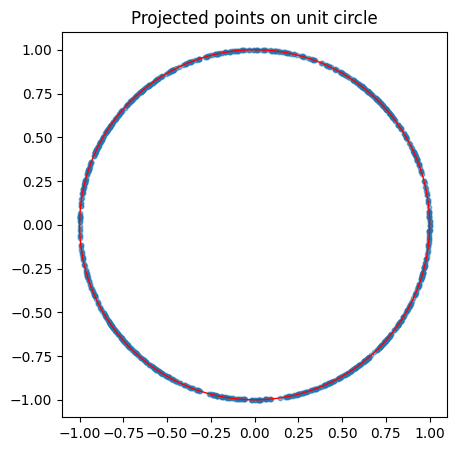

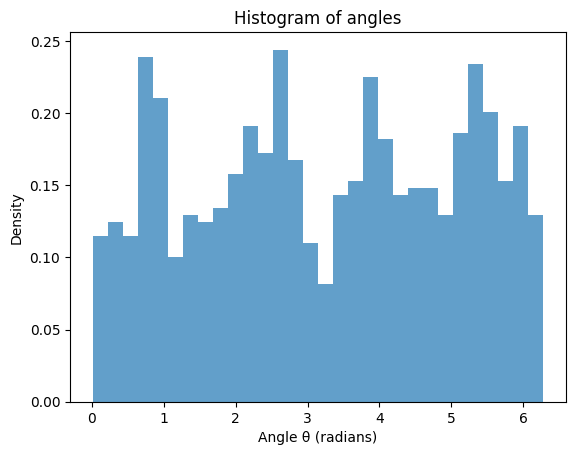

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
U = np.random.uniform(-1, 1, n)
V = np.random.uniform(-1, 1, n)
R = np.sqrt(U**2 + V**2)
X, Y = U / R, V / R

plt.figure(figsize=(5,5))
plt.scatter(X, Y, s=10, alpha=0.5)
circle = plt.Circle((0,0), 1, fill=False, color="red")
plt.gca().add_artist(circle)
plt.gca().set_aspect("equal")
plt.title("Projected points on unit circle")
plt.show()

theta = np.arctan2(Y, X)
theta[theta < 0] += 2*np.pi

plt.hist(theta, bins=30, density=True, alpha=0.7)
plt.xlabel("Angle θ (radians)")
plt.ylabel("Density")
plt.title("Histogram of angles")
plt.show()

this method does not give a uniform distribution on the circle.

<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

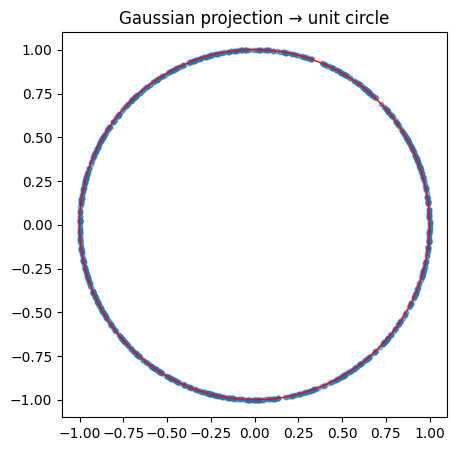

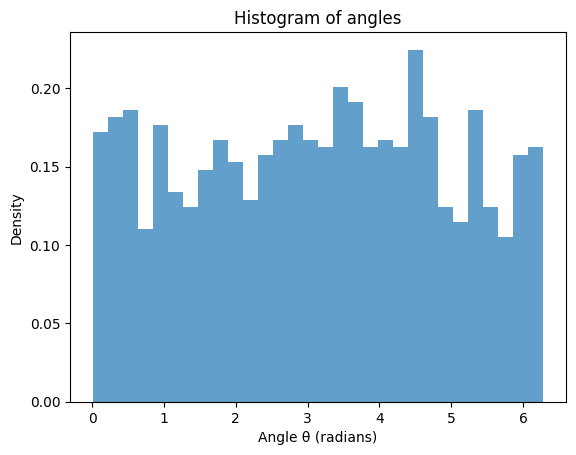

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
Z = np.random.normal(0, 1, n)
W = np.random.normal(0, 1, n)
R = np.sqrt(Z**2 + W**2)
X, Y = Z / R, W / R

plt.figure(figsize=(5,5))
plt.scatter(X, Y, s=10, alpha=0.5)
circle = plt.Circle((0,0), 1, fill=False, color="red")
plt.gca().add_artist(circle)
plt.gca().set_aspect("equal")
plt.title("Gaussian projection → unit circle")
plt.show()

theta = np.arctan2(Y, X)
theta[theta < 0] += 2*np.pi

plt.hist(theta, bins=30, density=True, alpha=0.7)
plt.xlabel("Angle θ (radians)")
plt.ylabel("Density")
plt.title("Histogram of angles")
plt.show()

(X,Y) is uniform on the circumference of the circle.

In (b), the square is not rotationally symmetric — so projecting distorts the angle distribution.

In (c), the Gaussian is rotationally symmetric — so projection preserves uniformity in angle.

<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.


To determine the probability that all three financial products simultaneously yield a positive return, we proceed as follows:

#### **Step 1: Properties of Independent Normal Variables**
If $X_1, X_2, X_3$ are independent and $X_i\sim{N}(\mu_i, \sigma_i^2)$ for $i = 1, 2, 3$, then:  
- $(X_1, X_2, X_3)$ follows a multivariate normal distribution.  
- The events $\{X_1 > 0\}, \{X_2 > 0\}, \{X_3 > 0\}$ are independent, so $P(X_1 > 0 \cap X_2 > 0 \cap X_3 > 0) = P(X_1 > 0) \cdot P(X_2 > 0) \cdot P(X_3 > 0)$.  


#### **Step 2: Define Variables and Distributions**
Let:  
- $X_1 \sim{N}(\mu_1 = 0.14, \sigma_1^2 = 0.0625)$ (U.S. stocks, $\sigma_1 = \sqrt{0.0625} = 0.25$).  
- $X_2 \sim{N}(\mu_2 = 0.07, \sigma_2^2 = 0.01)$ (U.S. bonds, $\sigma_2 = \sqrt{0.01} = 0.1$).  
- $X_3 \sim{N}(\mu_3 = 0.16, \sigma_3^2 = 0.09)$ (EM bonds, $\sigma_3 = \sqrt{0.09} = 0.3$).  


#### **Step 3: Individual Probabilities $P(X_i > 0)$**
For $X \sim{N}(\mu, \sigma^2)$, $P(X > 0) = \Phi\left( \frac{\mu - 0}{\sigma} \right)$ (using $1 - \Phi(-z) = \Phi(z)$).  

##### (a) U.S. Stocks ($X_1$):
$z_1 = \frac{\mu_1 - 0}{\sigma_1} = \frac{0.14}{0.25} = 0.56 \implies P(X_1 > 0) = \Phi(0.56) \approx 0.7123$

##### (b) U.S. Bonds ($X_2$):
$z_2 = \frac{\mu_2 - 0}{\sigma_2} = \frac{0.07}{0.1} = 0.7 \implies P(X_2 > 0) = \Phi(0.7) \approx 0.7580$

##### (c) EM Bonds ($X_3$):
$z_3 = \frac{\mu_3 - 0}{\sigma_3} = \frac{0.16}{0.3} \approx 0.5333 \implies P(X_3 > 0) = \Phi(0.5333) \approx 0.7031$  


#### **Step 4: Joint Probability**
Using independence:  
$$
\begin{align*}
P(X_1 > 0 \cap X_2 > 0 \cap X_3 > 0) &= P(X_1 > 0) \cdot P(X_2 > 0) \cdot P(X_3 > 0) \\
&\approx 0.7123 \cdot 0.7580 \cdot 0.7031 \\
&\approx 0.377
\end{align*}
$$  


#### **Final Answer**
The probability that all three financial products simultaneously yield a positive return is $\boxed{0.377}$.

<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

## Ans.



In [ ]:
import numpy as np
from scipy.linalg import cholesky

# Define mean vector and covariance matrix
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01, 0.0375],
    [-0.01, 0.01, -0.015],
    [0.0375, -0.015, 0.09]
])

# Cholesky decomposition: Sigma = L@L.T
L = cholesky(Sigma, lower = True)

# Number of simulations
N = 10**6

# Generate independent standard normal sample Z~N(0, I)
Z = np.random.normal(0, 1, size = (N, 3))

# Generate correlated samples X=mu+L@Z.T
X = mu[:, np.newaxis]+L@ Z.T

# Check how many samples have all components>0
positive_samples = np.all(X>0, axis=0)
probability = np.mean(positive_samples)

print(probability)

0.370642


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.


To solve for $\alpha$ and $\beta$ such that a uniform distribution on $[\alpha, \beta]$ has mean $0$ and variance $1$, we use the standard properties of the uniform distribution.

#### **Step 1: Using the Mean Condition**
For a random variable $X \sim \text{Uniform}(\alpha, \beta)$, the mean is given by:
$ \mathbb{E}[X] = \frac{\alpha + \beta}{2} $
We require the mean to be $0$:
$ \frac{\alpha + \beta}{2} = 0 $
Multiplying both sides by 2 gives:
$ \alpha + \beta = 0 $
This implies:
$ \beta = -\alpha $

#### **Step 2: Using the Variance Condition**
For a random variable $X \sim \text{Uniform}(\alpha, \beta)$, the variance is given by:
$ \text{Var}(X) = \frac{(\beta - \alpha)^2}{12} $
We require the variance to be $1$:
$ \frac{(\beta - \alpha)^2}{12} = 1 $

#### **Step 3: Solving for $\alpha$ and $\beta$**
Substitute $\beta = -\alpha$ from Step 1 into the variance equation:
$ \frac{(-\alpha - \alpha)^2}{12} = 1 $<br>
Simplify the expression inside the square:<br>
$ \frac{(-2\alpha)^2}{12} = 1 $<br>
$ \frac{4\alpha^2}{12} = 1 $<br>
Reduce the fraction:<br>
$ \frac{\alpha^2}{3} = 1 $<br>
Multiply both sides by 3:<br>
$ \alpha^2 = 3 $<br>
Taking the square root of both sides gives two possibilities:<br>
$ \alpha = \sqrt{3} \quad \text{or} \quad \alpha = -\sqrt{3} $<br>

#### **Step 4: Determining the Valid Interval**
A uniform distribution on $[\alpha, \beta]$ requires that $\alpha < \beta$.
- If $\alpha = \sqrt{3}$, then $\beta = -\sqrt{3}$, which gives the invalid interval $[\sqrt{3}, -\sqrt{3}]$.
- If $\alpha = -\sqrt{3}$, then $\beta = \sqrt{3}$, which gives the valid interval $[-\sqrt{3}, \sqrt{3}]$.

#### **Final Answer**
The values of $\alpha$ and $\beta$ are:
$ \boxed{\alpha = -\sqrt{3}, \quad \beta = \sqrt{3}} $

<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.


To find $\mathbb{E}[V_2]$ and $\text{Var}(V_2)$, we use the **law of total expectation** and **law of total variance**.

#### **Step 1: Recall Distributions**
- $X_1, X_2 \sim \text{Uniform}[\alpha, \beta]$ (i.i.d.), so $\mathbb{E}[X_1] = \mathbb{E}[X_2] = 0$ and $\text{Var}(X_1) = \text{Var}(X_2) = 1$.
- $B \sim \text{Bernoulli}(p)$, so $P(B = 0) = 1 - p$ and $P(B = 1) = p$.

#### **Step 2: Compute $\mathbb{E}[V_2]$**
By the **law of total expectation**:
$ \mathbb{E}[V_2] = \mathbb{E}\left[ \mathbb{E}[V_2 \mid B] \right] $

- If $B = 0$: $V_2 = X_1$, so $\mathbb{E}[V_2 \mid B = 0] = \mathbb{E}[X_1] = 0$.
- If $B = 1$: $V_2 = X_2$, so $\mathbb{E}[V_2 \mid B = 1] = \mathbb{E}[X_2] = 0$.

Thus:
$ \mathbb{E}[V_2] = (1 - p) \cdot 0 + p \cdot 0 = 0 $

#### **Step 3: Compute $\text{Var}(V_2)$**
By the **law of total variance**:
$ \text{Var}(V_2) = \mathbb{E}\left[ \text{Var}(V_2 \mid B) \right] + \text{Var}\left( \mathbb{E}[V_2 \mid B] \right) $

##### **Part 1: $\mathbb{E}\left[ \text{Var}(V_2 \mid B) \right]$**
- If $B = 0$: $V_2 = X_1$, so $\text{Var}(V_2 \mid B = 0) = \text{Var}(X_1) = 1$.
- If $B = 1$: $V_2 = X_2$, so $\text{Var}(V_2 \mid B = 1) = \text{Var}(X_2) = 1$.

Thus:
$ \mathbb{E}\left[ \text{Var}(V_2 \mid B) \right] = (1 - p) \cdot 1 + p \cdot 1 = 1 $

##### **Part 2: $\text{Var}\left( \mathbb{E}[V_2 \mid B] \right)$**
From Step 2, $\mathbb{E}[V_2 \mid B] = 0$ for all $B$, so:
$ \text{Var}\left( \mathbb{E}[V_2 \mid B] \right) = 0 $

#### **Step 4: Combine Results**
$ \text{Var}(V_2) = 1 + 0 = 1 $

#### **Final Answers**
- $\mathbb{E}[V_2] = \boxed{0}$
- $\text{Var}(V_2) = \boxed{1}$

<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.


To find the value of $p$ such that $\text{Cov}(V_1, V_2) = \sigma_{12}$, we start by recalling the definitions of $V_1$ and $V_2$:

- $V_1 = X_1$
- $V_2 = (1 - B)X_1 + BX_2$, where $B \sim \text{Bernoulli}(p)$, and $X_1, X_2 \sim \text{Uniform}[\alpha, \beta]$ (i.i.d. with $\mathbb{E}[X_1] = \mathbb{E}[X_2] = 0$, $\text{Var}(X_1) = \text{Var}(X_2) = 1$).

#### **Step 1: Expand Covariance**
Using the linearity of covariance:
$ \begin{align*}
\text{Cov}(V_1, V_2) &= \text{Cov}\left(X_1, (1 - B)X_1 + BX_2\right) \\
&= \text{Cov}\left(X_1, (1 - B)X_1\right) + \text{Cov}\left(X_1, BX_2\right) \\
&= \mathbb{E}[(1 - B)X_1^2] - \mathbb{E}[(1 - B)X_1]\mathbb{E}[X_1] + \mathbb{E}[BX_1X_2] - \mathbb{E}[BX_1]\mathbb{E}[X_2]
\end{align*} $

#### **Step 2: Simplify Using Independence and Means**
- $X_1$ and $X_2$ are independent, so $\mathbb{E}[X_1X_2] = \mathbb{E}[X_1]\mathbb{E}[X_2] = 0$.
- $\mathbb{E}[X_1] = \mathbb{E}[X_2] = 0$.

This simplifies the expression to:
$ \text{Cov}(V_1, V_2) = \mathbb{E}[(1 - B)X_1^2] $

#### **Step 3: Use Variance of $X_1$**
Since $\text{Var}(X_1) = \mathbb{E}[X_1^2] - (\mathbb{E}[X_1])^2 = 1$ and $\mathbb{E}[X_1] = 0$, we have $\mathbb{E}[X_1^2] = 1$.

Also, $B$ is independent of $X_1$ and $X_2$, so:
$ \mathbb{E}[(1 - B)X_1^2] = \mathbb{E}[1 - B] \cdot \mathbb{E}[X_1^2] = (1 - \mathbb{E}[B]) \cdot 1 $

#### **Step 4: Solve for $p$**
Since $B \sim \text{Bernoulli}(p)$, $\mathbb{E}[B] = p$. Thus:
$ \text{Cov}(V_1, V_2) = 1 - p $

We want $\text{Cov}(V_1, V_2) = \sigma_{12}$, so:
$ 1 - p = \sigma_{12} $

Solving for $p$:
$ p = 1 - \sigma_{12} $

#### **Final Answer**
The value of $p$ is $ \boxed{p = 1 - \sigma_{12}} $.

<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

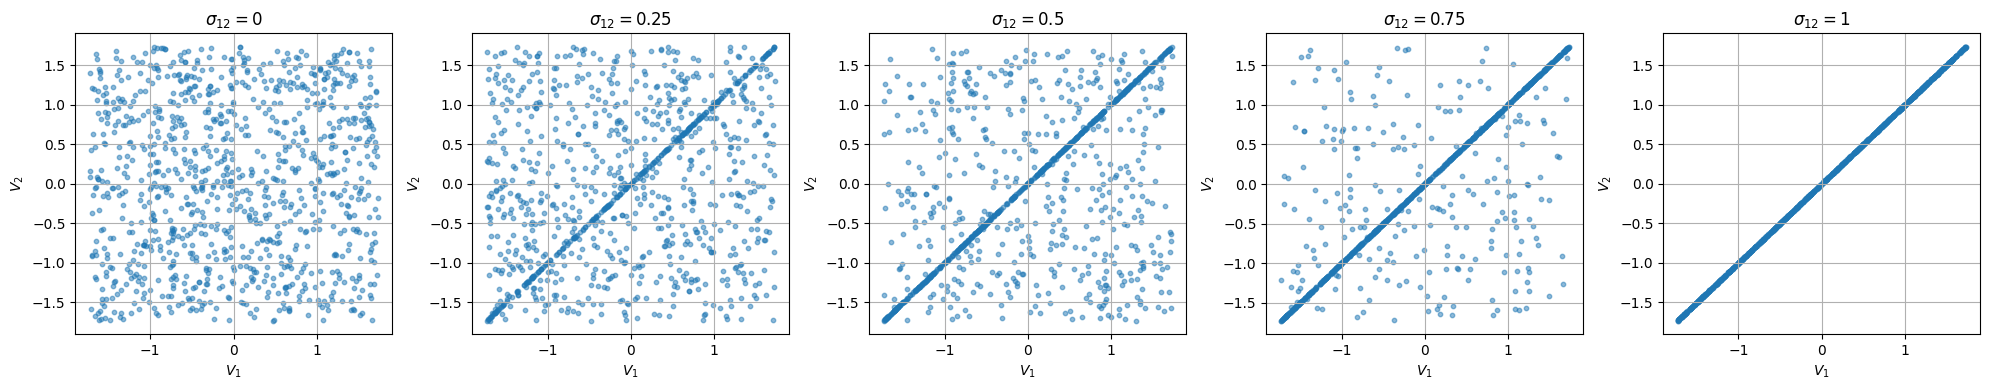

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = -np.sqrt(3)
beta = np.sqrt(3)

def generate_correlated_uniforms(sigma12, n_samples = 1000):
  # Step1: generate i.i.d uniforms X1, X2 ~ Uniform[alpha, beta]
  X1 = np.random.uniform(alpha, beta, n_samples)
  X2 = np.random.uniform(alpha, beta, n_samples)

  # Step2: Compute p from sigma12
  p = 1-sigma12

  # Step3: Generate Bernoulli B~Bernoulli(p)
  B = np.random.binomial(1, p, n_samples)

  # Step4: Construct V1 and V2
  V1 = X1
  V2 = (1-B)*X1+B*X2

  return V1, V2

sigma12_values = [0, 0.25, 0.5, 0.75, 1]
fig, axes = plt.subplots(1, len(sigma12_values), figsize=(20, 4))
for i, sigma12 in enumerate(sigma12_values):
    V1, V2 = generate_correlated_uniforms(sigma12, n_samples=1000)
    axes[i].scatter(V1, V2, alpha=0.5, s=10)
    axes[i].set_title(f'$\\sigma_{{12}} = {sigma12}$')
    axes[i].set_xlabel('$V_1$')
    axes[i].set_ylabel('$V_2$')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

In [ ]:
# Generate samples for sigma12 = 0.5
sigma12 = 0.5
n_samples = 10**6
V1, V2 = generate_correlated_uniforms(sigma12, n_samples)

# Count samples where V1 <= 0 and V2 <= 0
mask = (V1 <= 0) & (V2 <= 0)
probability = np.mean(mask)

print(f"Estimated P[V1 <= 0, V2 <= 0] for sigma12 = {sigma12}: {probability:.4f}")

Estimated P[V1 <= 0, V2 <= 0] for sigma12 = 0.5: 0.3739


<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


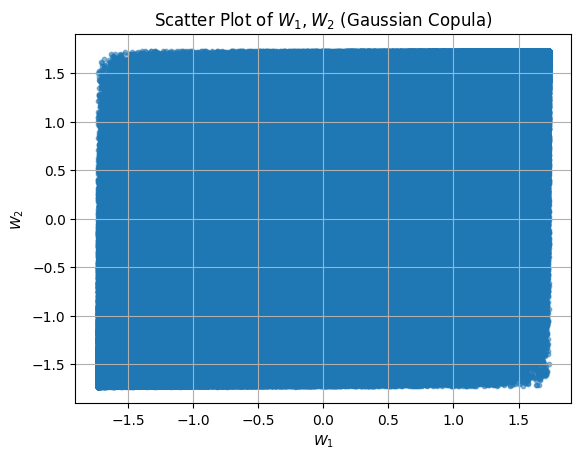

Estimated P[W1 >= 0, W2 >= 0]: 0.3335


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

alpha = -np.sqrt(3)
beta = np.sqrt(3)
sigma12 = 0.5
Sigma = np.array([[1, sigma12], [sigma12, 1]])
n_sampels = 10**6

def generate_gaussian_copula_uniforms(Sigma, alpha, beta, n_samples):
  # generate multivariate normal Z1, Z2 ~ N(0, sigma)
  Z = np.random.multivariate_normal(mean = [0, 0], cov = Sigma, size = n_samples)
  Z1, Z2 = Z[:, 0], Z[:, 1]

  # Compute W1 and W2 using normal CDF
  phi_Z1 = norm.cdf(Z1)
  phi_Z2 = norm.cdf(Z2)
  W1 = alpha + (beta - alpha) * phi_Z1
  W2 = alpha + (beta - alpha) * phi_Z2

  return W1, W2

# Generate samples
W1, W2 = generate_gaussian_copula_uniforms(Sigma, alpha, beta, n_samples)

# Scatter plot
plt.scatter(W1, W2, alpha=0.5, s=10)
plt.title('Scatter Plot of $W_1, W_2$ (Gaussian Copula)')
plt.xlabel('$W_1$')
plt.ylabel('$W_2$')
plt.grid(True)
plt.show()

# Compute P[W1 >= 0, W2 >= 0]
mask = (W1 >= 0) & (W2 >= 0)
probability = np.mean(mask)
print(f"Estimated P[W1 >= 0, W2 >= 0]: {probability:.4f}")